# Objective

Use __KNN__, __Decision Trees__ and __Ensemble Learning__ to build classifiers for predicting labels as Magnitude($M_w$). 

1. Use an appropriate threshold, $T$, that seem fit between $[4, 5]$ inclusive. For $M_w < T$, label becomes $0$ (no earthquake) and for $M_w \geq T$ becomes $1$ (earthquake). 
2. Use appropriate features as input from the dataset that you seem fit.
3. Use `roc_auc()` score as evaluation metric.

## Dataset Overview

You are given the enclosed data files in the csv file. They are data about occurrences of earth quakes in a geographical region. The meta data is :

* **Sl. No.**: Serial Number
* **Year, Month, Day**: Date of a particular earthquake as per UTC (Coordinated Universal Time)
* **Origin Time** of earthquake in UTC and IST (Indian Standard Time) in $[Hour: Minute: seconds]$ format 
* **Magnitude of Earthquake**: There are a different way to represent the magnitude of an earthquake. For your study, you can consider $M_w$, since we are deriving other types from $M_w$ only.
* GPS Location in terms of Latitude(Lat) and Longitude(Long) of earthquake.
* **Depth**: Depth of occurrence of an earthquake in kilometre
* **Location**: Name of a region where an earthquake took place
* **Source**: The agency from which we have gathered the data, for e.g. IMD=Indian Meteorological Department, Min. of Earth Science, Government of India\
A sample row :

| 52165 | 2016 | 7   | 7   | 22:24:02 | 3.3 | 3.3 | 3.164855 | 2.438576 | 3.019937 | 26.8 N | 89.5 E | 40  | Jalpaiguri,West Bengal | IMD |
|-------|------|-----|-----|----------|-----|-----|----------|----------|----------|--------|--------|-----|------------------------|-----|

<br>read as:<br>
**"A 3.3 magnitude earthquake occurred on 7th July 2016 at 22:24:02 (UTC). The location of earthquake event was Jalpaiguri, West Bengal area with GPS location 26.8 N 89.5 E at a depth of 40km published by the source IMD"**

# Import Essential Libraries...

In [1]:
import os
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('axes', labelsize=20)
mpl.rc('xtick', labelsize=18)
mpl.rc('ytick', labelsize=18)
import seaborn as sns

In [34]:
# Data Cleaning Libraries...

from sklearn.impute import KNNImputer
#from impyute.imputation.cs import mice
import datawig

# importing the MICE from fancyimpute library
from fancyimpute import IterativeImputer as MICE
# Calling Estimators for IterativeImputer class from Scikit library
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

# EDA (Exploratory Data Analysis)

In [2]:
# Iport dataset
data = pd.read_excel("Indian Earthquakes List Update_Magnitudes.xls")

In [3]:
data.head(10)

,Earthquake Engineering Research Centre,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,International Institute of Information Technology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Gachibowli, Hyderabad - 500 032 India",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,INDIAN EARTHQUAKES CATALOG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PERIOD : 2474 BC - 2015 AD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Total Number of Earthquakes : 52258 (31 Oct 2016),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Sl. No.,YEAR,MONTH,DATE,ORIGIN TIME,NaN,MAGNITUDE,NaN,NaN,NaN,NaN,NaN,LAT (N),LONG (E),DEPTH (km),INTENSITY,NaN,NaN,LOCATION,REFERENCE
9,NaN,NaN,NaN,NaN,(UTC),(IST),Mw,Mw,Mb,Mb,Ms,ML,NaN,NaN,NaN,MM,MMI,MME,NaN,NaN


**Remove first 8 rows to remove the title of sheet and other additional information that are basically subtitles.**

In [4]:
data = data.iloc[8:, :]

In [5]:
data.head(10)

,Earthquake Engineering Research Centre,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
8,Sl. No.,YEAR,MONTH,DATE,ORIGIN TIME,NaN,MAGNITUDE,NaN,NaN,NaN,NaN,NaN,LAT (N),LONG (E),DEPTH (km),INTENSITY,NaN,NaN,LOCATION,REFERENCE
9,NaN,NaN,NaN,NaN,(UTC),(IST),Mw,Mw,Mb,Mb,Ms,ML,NaN,NaN,NaN,MM,MMI,MME,NaN,NaN
10,1,-2474,0,0,NaN,NaN,7.5,7.5,NaN,6.969203,8.784588,7.427072,71,24,0,NaN,NaN,NaN,NaN,Dr STGR
11,2,-325,0,0,NaN,NaN,7.5,7.5,NaN,6.969203,8.784588,7.427072,71,24,0,NaN,NaN,NaN,NaN,Dr STGR
12,3,25,0,0,NaN,NaN,7.5,7.5,NaN,6.969203,8.784588,7.427072,72.9,33.72,0,NaN,NaN,NaN,NaN,Dr STGR
13,4,26,5,10,08.19.10.0,NaN,6.1397,6.1397,5.737047,5.737047,6.402277,5.999685,17.3,80.1,NaN,NaN,NaN,NaN,NaN,NEIC
14,5,26,5,10,08.19.10.0,NaN,6.1397,6.1397,5.737047,5.737047,6.402277,5.999685,26,97,80,NaN,NaN,NaN,Myanmar,G-R
15,6,50,0,0,NaN,NaN,7,7,NaN,6.516304,7.908932,6.902413,69.5,37.1,0,NaN,NaN,NaN,NaN,Dr STGR
16,7,110,0,0,NaN,NaN,6.5,6.5,NaN,6.063406,7.033275,6.377754,76.47,18.1,0,NaN,NaN,NaN,NaN,Dr STGR
17,8,250,0,0,NaN,NaN,8.5,8.5,NaN,7.875,10.535902,8.47639,74.5,34.6,0,NaN,NaN,NaN,NaN,Dr STGR


## Renaming the columns...

Rename the columns (i.e., to merge two rows that consists of column names). Below is the table for column names.

In [6]:
# Derive column names from first two rows.
# construct list of column names.
lst_colnames = []; dict_ctr = {}
for val1, val2 in zip(data.iloc[0, :].to_dict().values(), data.iloc[1, :].to_dict().values()):
    # check if 2nd row entry is NaN, if not then check for corresponding 1st row entry. 
    #If not Nan add both else add 2nd row entry to last entry made from 1st row.
    if pd.notna(val2):
        if pd.notna(val1):
            # keeping counter of every col-names
            dict_ctr[val1.strip() + "-" + val2.strip()] = 0
            lst_colnames.append(val1.strip() + "-" + val2.strip())
        else:
            #check if names we're adding are same.
            to_be_added = (lst_colnames[-1].split("-")[0]).strip() + "-" + val2.strip()
            if to_be_added not in lst_colnames:
                # keeping counter of every col-names
                dict_ctr[to_be_added] = 0
                lst_colnames.append(to_be_added)
            else:
                dict_ctr[to_be_added] += 1
                lst_colnames.append(to_be_added + str(dict_ctr[to_be_added]))
    else:
        lst_colnames.append(val1.strip())

In [7]:
# Redefine column names of data frame
data = data.iloc[2:,:]
data.columns = lst_colnames

In [8]:
lst_colnames

['Sl. No.',
 'YEAR',
 'MONTH',
 'DATE',
 'ORIGIN TIME-(UTC)',
 'ORIGIN TIME-(IST)',
 'MAGNITUDE-Mw',
 'MAGNITUDE-Mw1',
 'MAGNITUDE-Mb',
 'MAGNITUDE-Mb1',
 'MAGNITUDE-Ms',
 'MAGNITUDE-ML',
 'LAT (N)',
 'LONG (E)',
 'DEPTH (km)',
 'INTENSITY-MM',
 'INTENSITY-MMI',
 'INTENSITY-MME',
 'LOCATION',
 'REFERENCE']

In [9]:
data.head(7)

,Sl. No.,YEAR,MONTH,DATE,ORIGIN TIME-(UTC),ORIGIN TIME-(IST),MAGNITUDE-Mw,MAGNITUDE-Mw1,MAGNITUDE-Mb,MAGNITUDE-Mb1,MAGNITUDE-Ms,MAGNITUDE-ML,LAT (N),LONG (E),DEPTH (km),INTENSITY-MM,INTENSITY-MMI,INTENSITY-MME,LOCATION,REFERENCE
10,1,-2474,0,0,NaN,NaN,7.5,7.5,NaN,6.969203,8.784588,7.427072,71,24,0,NaN,NaN,NaN,NaN,Dr STGR
11,2,-325,0,0,NaN,NaN,7.5,7.5,NaN,6.969203,8.784588,7.427072,71,24,0,NaN,NaN,NaN,NaN,Dr STGR
12,3,25,0,0,NaN,NaN,7.5,7.5,NaN,6.969203,8.784588,7.427072,72.9,33.72,0,NaN,NaN,NaN,NaN,Dr STGR
13,4,26,5,10,08.19.10.0,NaN,6.1397,6.1397,5.737047,5.737047,6.402277,5.999685,17.3,80.1,NaN,NaN,NaN,NaN,NaN,NEIC
14,5,26,5,10,08.19.10.0,NaN,6.1397,6.1397,5.737047,5.737047,6.402277,5.999685,26,97,80,NaN,NaN,NaN,Myanmar,G-R
15,6,50,0,0,NaN,NaN,7,7,NaN,6.516304,7.908932,6.902413,69.5,37.1,0,NaN,NaN,NaN,NaN,Dr STGR
16,7,110,0,0,NaN,NaN,6.5,6.5,NaN,6.063406,7.033275,6.377754,76.47,18.1,0,NaN,NaN,NaN,NaN,Dr STGR


In [10]:
# See description of data
data.describe(include = 'all')

,Sl. No.,YEAR,MONTH,DATE,ORIGIN TIME-(UTC),ORIGIN TIME-(IST),MAGNITUDE-Mw,MAGNITUDE-Mw1,MAGNITUDE-Mb,MAGNITUDE-Mb1,MAGNITUDE-Ms,MAGNITUDE-ML,LAT (N),LONG (E),DEPTH (km),INTENSITY-MM,INTENSITY-MMI,INTENSITY-MME,LOCATION,REFERENCE
count,52989,52989,52971,52932,21186,426,40935.0,50482.0,12283.0,50497.000000,52820.000000,52820.000000,52989,52989.0,50811.0,41,0,0,9374,51407
unique,52974,261,14,32,18093,425,221.0,234.0,159.0,237.000000,235.000000,235.000000,10790,10939.0,2359.0,17,0,0,1637,38
top,1,2005,1,27,..,07:25:33,4.3,4.3,4.5,4.070652,3.180385,4.069255,71,36.5,0.0,V,NaN,NaN,Myanmar,Dr STGR
freq,2,7241,6363,2635,8,2,5251.0,5251.0,926.0,5251.000000,5251.000000,5251.000000,132,248.0,10879.0,11,NaN,NaN,1574,30468


## Deciding which columns to drop and which to keep - DATA cleaning

In [11]:
# Check number of NaN values in the data frame
print(data.isnull().sum().sort_values(ascending = False)) # or print(data.isna().sum())

INTENSITY-MME        52989
INTENSITY-MMI        52989
INTENSITY-MM         52948
ORIGIN TIME-(IST)    52563
LOCATION             43615
MAGNITUDE-Mb         40706
ORIGIN TIME-(UTC)    31803
MAGNITUDE-Mw         12054
MAGNITUDE-Mw1         2507
MAGNITUDE-Mb1         2492
DEPTH (km)            2178
REFERENCE             1582
MAGNITUDE-Ms           169
MAGNITUDE-ML           169
DATE                    57
MONTH                   18
LONG (E)                 0
LAT (N)                  0
YEAR                     0
Sl. No.                  0
dtype: int64


In [12]:
# Shape of the data frame
print("Shape of Data: ", data.shape)

Shape of Data:  (52989, 20)


In [13]:
# Percentage of Null values in the data frame.
print("Percentage of NaN in the data frame: %.3f"%(data.isnull().sum().sum()*100 / np.product(data.shape)))

Percentage of NaN in the data frame: 32.916


__Since 33% is a considerable amount, removing the irrelevant columns would help for predicting *Mw*.__

1. __Since, no. of data samples is 52989 which is comparable or significantly more in no. to the no. of missing values in the columns upto ORIGIN-TIME-(UTC), we'll drop these columns.__
2. __Further, LAT and LONG will compensate for LOCATION attribute. And Sl. No. is of no relevance.__

In [14]:
# Check whether these two Mw columns are same (after removing NaN from Mw and the corresponding rows in Mw1).
(data[data["MAGNITUDE-Mw"].notnull()])["MAGNITUDE-Mw"] == (data[data["MAGNITUDE-Mw"].notnull()])["MAGNITUDE-Mw1"]

10       True
11       True
12       True
13       True
14       True
         ... 
52994    True
52995    True
52996    True
52997    True
52998    True
Length: 40935, dtype: bool

In [15]:
# Efficient way to check.
(data[data["MAGNITUDE-Mw"].notnull()])["MAGNITUDE-Mw"].equals((data[data["MAGNITUDE-Mw"].notnull()])["MAGNITUDE-Mw1"])

True

1. __So it's evident from the above fact to drop the Mw and keep the Mw1.__
2. __Plus we'll drop all other MAGNITUDE columns as we need to predict Mw1.__


1. Since shape of the dataset $= 52989 \times 20$ and keeping an eye on percentage of `NaN` cells in the dataframe (i.e., $32. 916 \%$) we couldn’t remove all the rows or cols with NaN cells as that could cause whole data wipe out and hence a significant loss. So what we can do, we can drop those columns thath contains a significant amount of `NaN` such as:<br>
`INTENSITY-MME`, `INTENSITY-MMI`, `INTENSITY-MM`, `ORIGIN TIME-(IST)`, `LOCATION`, `MAGNITUDE-Mb`, and `ORIGIN TIME-(UTC)` whose `NaN` counts are over $50\%$.
2. Now coming to the columns whose existence doesn’t at all matters or have any relevance are the ones that provide extra information about each data point. Since our motive is to predict the $M_w$ (i.e., the magnitude of earthquake), `Sl. No.` , and `REFERENCE` have no role in helping out for prediction.
3. Further, columns like `MAGNITUDE-Mb1` , `MAGNITUDE-Ms` , and `MAGNITUDE-ML` are related to magnitude and these features are obtained only when earthquake occurs. So it doesn’t make sense to use these if we were to predict earthquake in future or at some location.
4. Now, `MAGNITUDE-Mw` and `MAGNITUDE-Mw1` are the same columns. The only aspect at where they differ is the number of `NaN` cells. If we remove the rows from DataFrame corresponding to `NaN` cells of `MAGNITUDE-Mw` and check for equality of both columns then we got `True` flag. So, it’s better to keep the `MAGNITUDE-Mw1` column for our prediction purpose and drop the other one.

In [16]:
#Drop columns...
# Remove two columns name is 'C' and 'D'
#df.drop(['C', 'D'], axis = 1)
# Remove three columns as index base
#df.drop(df.columns[[0, 4, 2]], axis = 1, inplace = True)
# df.drop(columns =['C', 'D'])
# Remove all columns between column index 1 to 3
#df.drop(df.iloc[:, 1:3], inplace = True, axis = 1)
# Remove all columns between column name 'B' to 'D'
#df.drop(df.ix[:, 'B':'D'].columns, axis = 1)
# Remove all columns between column name 'B' to 'D'
#df.drop(df.loc[:, 'B':'D'].columns, axis = 1)
label = data['MAGNITUDE-Mw1']
data.drop(columns = ['INTENSITY-MME', 
                     'INTENSITY-MMI', 
                     'INTENSITY-MM', 
                     'ORIGIN TIME-(IST)', 
                     'LOCATION', 
                     'MAGNITUDE-Mb', 
                     'ORIGIN TIME-(UTC)', 
                     'MAGNITUDE-Mw', 
                     'MAGNITUDE-Mw1', 
                     'MAGNITUDE-Mb1', 
                     'REFERENCE', 
                     'MAGNITUDE-Ms', 
                     'MAGNITUDE-ML', 
                     'Sl. No.'], inplace = True)
# inplace Job is to transform at address location and return None, rather returning a transformed copy of the same.

In [17]:
data

,YEAR,MONTH,DATE,LAT (N),LONG (E),DEPTH (km)
10,-2474,0,0,71,24,0
11,-325,0,0,71,24,0
12,25,0,0,72.9,33.72,0
13,26,5,10,17.3,80.1,NaN
14,26,5,10,26,97,80
...,...,...,...,...,...,...
52994,2019,7,28,32.8°N,78.4°E,10
52995,2019,7,28,25.5°N,90.4°E,70
52996,2019,7,28,23.2°N,86.5°E,22
52997,2019,7,29,32.8°N,76.4°E,20


## Transforming the DATE, MONTH and YEAR column.

__Let's transform the Year, Date, and Month columns.__

*Method of Transformation...*
1. Remove __First Two Rows__ as it contains negative year.
2. Replace '0' in MONTH and DATE column with `NaN`, since there are no zero months and date.
3. Since the values in year column are in chronological order, we devised a method of imputaton for both date and month.
    1. Put $Month=1$ if no months have been registered for the same year, else put $value=+1$ to the the value from preceding month.
    2. If preceding $month = 12$ for the same year, keep the current month as 12 and make one step increment in date. Follow the same procedure for date column too.
    3. If $date = 31$ and $month = 12$, then change change the year itself with one step increment putting the date as `01/01/incremented year`.
    4. While, if $date = 31$ and $month < 12$, then the date would be `01/current_month + 1/current_year`.

In [18]:
# Replace zero in both Month and Date column with nan values.
#Method 1: data = (data.replace({'MONTH':{0: np.nan, " ":np.nan, " ":np.nan}, 
#                      'DATE':{0: np.nan, " ":np.nan, " ":np.nan}})).iloc[2:, :]
# Method 2: data[['MONTH', 'DATE']] = data[['MONTH', 'DATE']].replace({0: np.nan})
# Method 3: data.replace(to_replace = [0, "", " "], value = np.nan, inplace=True)

# Convert 0, one-unit length string or empty string to NaN.
data = (data.replace({'MONTH':{0: np.nan, " ":np.nan, " ":np.nan}, 
                      'DATE':{0: np.nan, " ":np.nan, " ":np.nan}})).iloc[2:, :]# Remove first two rows...

In [19]:
data.head(8)

,YEAR,MONTH,DATE,LAT (N),LONG (E),DEPTH (km)
12,25,NaN,NaN,72.9,33.72,0
13,26,5.0,10.0,17.3,80.1,NaN
14,26,5.0,10.0,26,97,80
15,50,NaN,NaN,69.5,37.1,0
16,110,NaN,NaN,76.47,18.1,0
17,250,NaN,NaN,74.5,34.6,0
18,260,NaN,NaN,77.2,30.5,0
19,819,6.0,1.0,65.4,36.4,0


In [20]:
#reset the index of the dataframe...
data.reset_index(drop = True, inplace = True)
data.head(10)

,YEAR,MONTH,DATE,LAT (N),LONG (E),DEPTH (km)
0,25,NaN,NaN,72.9,33.72,0
1,26,5.0,10.0,17.3,80.1,NaN
2,26,5.0,10.0,26,97,80
3,50,NaN,NaN,69.5,37.1,0
4,110,NaN,NaN,76.47,18.1,0
5,250,NaN,NaN,74.5,34.6,0
6,260,NaN,NaN,77.2,30.5,0
7,819,6.0,1.0,65.4,36.4,0
8,825,NaN,NaN,91.8,26.1,0
9,849,NaN,NaN,62.2,34.3,0


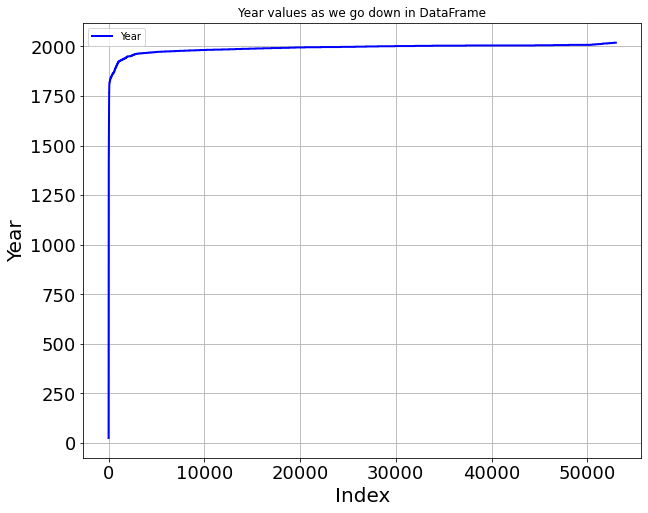



Zooming into the range from 1750 and onwards...


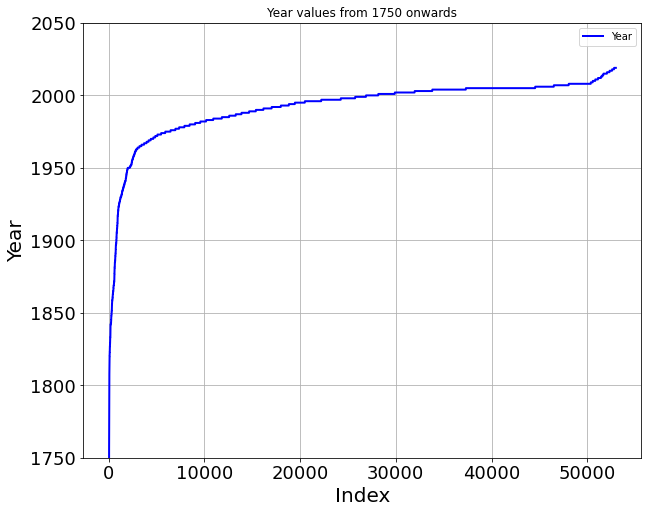

In [21]:
# Plotting Year column to see if it's in Non-decreasing order.
plt.figure(figsize = (10,8))
plt.plot(np.arange(0, len(data)), data.YEAR, color = 'b', linestyle = '-', linewidth = 2, label = 'Year')
plt.ylabel("Year"); plt.xlabel("Index"); plt.title("Year values as we go down in DataFrame")
plt.grid(); plt.legend(); plt.show()
print("\n\nZooming into the range from 1750 and onwards...")
plt.figure(figsize = (10,8))
plt.plot(np.arange(0, len(data)), data.YEAR, color = 'b', linestyle = '-', linewidth = 2, label = 'Year')
plt.ylabel("Year"); plt.xlabel("Index"); plt.ylim(1750, 2050); plt.title("Year values from 1750 onwards")
plt.grid(); plt.legend(); plt.show()

In [22]:
# Impute the NaN values in Month and Date column...
def month_date_imputer(df_mm_dd_yy):
    """
    Takes in month, date and year column and impute the NaN values 
    in month as well as date col according to the strategy given above.
    Output:
        Imputed Month & Date Columns
    """
    # iterate through each row and select 'Name' and 'Age' column respectively.
    #for index, row in df.iterrows():
    #    print (row["Name"], row["Age"])
    # iterate through each row and select 'Name' and 'Percentage' column respectively.
    #for row in df.itertuples(index = True, name ='Pandas'):
    #    print (getattr(row, "Name"), getattr(row, "Percentage"))
    # 0th and 2nd index column respectively.
    #for i in range(len(df)) :
    #  print(df.iloc[i, 0], df.iloc[i, 2])
    if pd.isna(df_mm_dd_yy.iloc[0,:].MONTH):
        df_mm_dd_yy.iloc[0,:].MONTH = 1
    if pd.isna(df_mm_dd_yy.iloc[0,:].DATE):
        df_mm_dd_yy.iloc[0,:].DATE = 1
    prev_row = df_mm_dd_yy.iloc[0,:]
    # Iterate over the NaN Month values...
    for row in (df_mm_dd_yy[df_mm_dd_yy['MONTH'].isnull()]).itertuples():
        # current row for the nan month and it's previous row 
        cur_row, prev_row = df_mm_dd_yy.iloc[row.Index, :], df_mm_dd_yy.iloc[row.Index - 1, :]
        # check if year for current idx and prev idx are same.
        if cur_row.YEAR == prev_row.YEAR:
            if cur_row.MONTH == 12:
                df_mm_dd_yy.loc[row.Index, "MONTH"] = 12
            else:
                df_mm_dd_yy.loc[row.Index, "MONTH"] = prev_row.MONTH + 1
        else:
            df_mm_dd_yy.loc[row.Index, "MONTH"] = 1
    # Iterate over NaN date Values...
    for row in (df_mm_dd_yy[df_mm_dd_yy['DATE'].isnull()]).itertuples():
        # current row for the nan month and it's previous row 
        cur_row, prev_row = df_mm_dd_yy.iloc[row.Index, :], df_mm_dd_yy.iloc[row.Index - 1, :]
        # check if year for current idx and prev idx are same.
        if (cur_row.YEAR == prev_row.YEAR) and (cur_row.MONTH == prev_row.MONTH):
            if cur_row.DATE == 31:
                if cur_row.MONTH == 12:
                    df_mm_dd_yy.loc[row.Index] = np.array([cur_row.YEAR + 1, 1, 1])
                else: 
                    df_mm_dd_yy.loc[row.Index] = np.array([cur_row.YEAR, cur_row.MONTH + 1, 1])
            else:
                df_mm_dd_yy.loc[row.Index, "DATE"] = prev_row.DATE + 1
        else:
            df_mm_dd_yy.loc[row.Index, "DATE"] = 1
    return df_mm_dd_yy

The following is a (false positive) warning. The potential for false positives is addressed in the docs on indexing, if you'd like to read further. You can safely disable this new warning with the following assignment.
https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

In [23]:
pd.options.mode.chained_assignment = None
data[["YEAR", "MONTH", "DATE"]] = month_date_imputer(data[["YEAR", "MONTH", "DATE"]])

In [24]:
# Check for Number of Null Values in all columns...
data.isnull().sum()

YEAR             0
MONTH            0
DATE             0
LAT (N)          0
LONG (E)         0
DEPTH (km)    2178
dtype: int64

## Type conversion for Year, Month and Date

Since **YEAR** is of `object`, and **MONTH** and **DATE** are of `float64` type, we typecast them all to `Int32` format.

In [25]:
data.dtypes

YEAR           object
MONTH         float64
DATE          float64
LAT (N)        object
LONG (E)       object
DEPTH (km)     object
dtype: object

In [26]:
# Convert dtypes of YEAR, MONTH, and DATE to int32.
# Convert dtype of LAT and LONG to float32 after removing the special characters.

#data[["YEAR", "MONTH", "DATE"]] = data[["YEAR", "MONTH", "DATE"]].apply(pd.to_numeric) 
# Assign a numeric dtype which may be float or int
data = data.astype({"YEAR":"int32", "MONTH":"int32", "DATE":"int32"}) 
# allows to convert the dtype according to user

## Cleaning Latitude and Longitude Column

All entries in **LAT (N)** and **LONG (E)** columns are `string` type (i.e., `object` type) out of which most of them are just plain string of `float` type values while other cantains some special character like **N**, **S**, **E**, **W**, **-**, **◦** ($= degree$), and **" "** (i.e, space character) which are pre-processed to obtain `float32` values.

In [27]:
#Transform LAT and LONG columns.
def to_numeric(x):
    """
    convert the given string to numeric while removing the unwanted characters.
    """
    try:
        return np.float32(x)# return after removing the white spaces.
    except:
        return np.float32("".join([k for k in x if k not in ['N', 'S', chr(32), 'W', 'E', chr(176), chr(65392)]]))
        

In [28]:
#Tranforming both Lat and Long.
data['LAT (N)'] = data['LAT (N)'].apply(to_numeric)
data['LONG (E)'] = data['LONG (E)'].apply(to_numeric)

In [29]:
data.head()

,YEAR,MONTH,DATE,LAT (N),LONG (E),DEPTH (km)
0,25,1,1,72.900002,33.720001,0
1,26,5,10,17.299999,80.099998,NaN
2,26,5,10,26.000000,97.000000,80
3,50,1,1,69.500000,37.099998,0
4,110,1,1,76.470001,18.100000,0


## Cleaning and Imputing Depth Column

__Overview:__ Converted "0", and " " to `NaN` and then used `KNN`, `MICE` and it’s different versions, and `DataWig` to impute **Depth** Column.
* With `KNNImputer()` and `IterativeImputer()` class from `scikit-learn` package we implemented $4$ different versions of imputaion with $3$ versions of `IterativeImputer()`.
* `KNNImputer()` imputes new sample by finding the samples in the training set “closest” (in terms of “Euclidean” distance) to it and averages these nearby points to fill in the value.
* While the `IterativeImputer()` refers to a process where each feature is modeled as a function of the other features, e.g. a regression problem where missing values are predicted.
    * Each feature is imputed sequentially, one after the other that allows to use the prior imputed values as a part of a model in predicting subsequent features.
    * Since this process is repeated multiple times it is iterative in nature, allowing ever improved estimates of missing values to be calculated as missing values across all features are estimated.
    * This approach may be generally referred to as fully conditional specification (**FCS**) or multivariate imputation by chained equations (**MICE**).
* Different regression algorithms can be used to estimate the missing values for each feature, and hence we used 3 different regressors, namely:
    1. `BayesianRidge()`, the default one.
    2. `ExtraTreesRegressor(n_estimators=50, random_state=0)`.
    3. `RandomForestRegressor(n_estimators=50, random_state=0)`.
* `DataWig()` is a neural-network model that predict the imputed values using other features. This method proved to be inefficient for our dataframe and got earlystopped at $5^{th}$ epoch due to divergence.

In [30]:
# Time to transform the Depth col.
# Since a lot of entries are zero, we need to convert them to Nan and impute it using certain methods.
data = data.replace({"DEPTH (km)":{0:np.nan, " ":np.nan, "":np.nan}})

In [31]:
data.isna().sum() #or data.isnull().sum()

YEAR              0
MONTH             0
DATE              0
LAT (N)           0
LONG (E)          0
DEPTH (km)    13055
dtype: int64

### Imputation with KNN, MICE (from `fancyimpute`), DataWig, and IterativeImputer (of Scikit-Learn) with 3 diff estimators.

#### KNN

In [35]:
# We'll try above 3 imputation methods

# define KNNimputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
data_transformed_KNN = imputer.fit_transform(data)

In [36]:
data_transformed_KNN = pd.DataFrame(data_transformed_KNN, columns = ['YEAR', 'MONTH', 'DATE', 'LAT (N)', 'LONG (E)', 'DEPTH (km)'])

In [37]:
data_transformed_KNN.head(9)

,YEAR,MONTH,DATE,LAT (N),LONG (E),DEPTH (km)
0,25.0,1.0,1.0,72.900002,33.720001,70.0
1,26.0,5.0,10.0,17.299999,80.099998,70.0
2,26.0,5.0,10.0,26.000000,97.000000,80.0
3,50.0,1.0,1.0,69.500000,37.099998,70.0
4,110.0,1.0,1.0,76.470001,18.100000,70.0
5,250.0,1.0,1.0,74.500000,34.599998,70.0
6,260.0,1.0,1.0,77.199997,30.500000,70.0
7,819.0,6.0,1.0,65.400002,36.400002,70.0
8,825.0,1.0,1.0,91.800003,26.100000,70.0


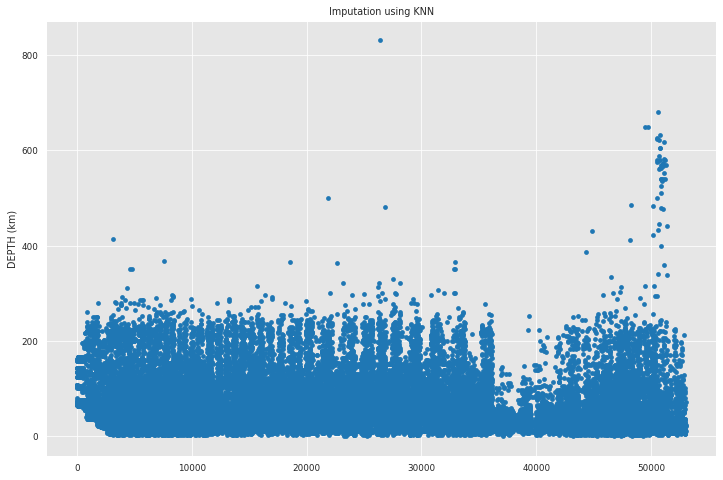

In [38]:
plt.figure(figsize = (12,8))
# reset the default parameters by calling set_theme():
sns.set_style("darkgrid", {"axes.facecolor": ".9"})#sns.axes_style("darkgrid")
sns.set_context("paper")#"talk", "poster"
sns.scatterplot(x = np.arange(len(data_transformed_KNN)), y = data_transformed_KNN['DEPTH (km)'], linewidth = 0)
plt.title("Imputation using KNN"); plt.show()

#### DataWig

In [36]:
# Split the data into two for training and testing.
df_train, df_test = data[data["DEPTH (km)"].notnull()], data[data["DEPTH (km)"].isnull()]
#datawig.utils.random_split(data)

In [45]:
df_test

,YEAR,MONTH,DATE,LAT (N),LONG (E),DEPTH (km)
0,25,1,1,72.900002,33.720001,NaN
1,26,5,10,17.299999,80.099998,NaN
3,50,1,1,69.500000,37.099998,NaN
4,110,1,1,76.470001,18.100000,NaN
5,250,1,1,74.500000,34.599998,NaN
...,...,...,...,...,...,...
50350,2008,12,29,99.440002,19.719999,NaN
50352,2008,12,29,70.070000,36.500000,NaN
50354,2008,12,29,64.430000,23.450001,NaN
50358,2008,12,31,67.500000,30.450001,NaN


In [40]:
#Initialize a SimpleImputer model
#Fit DataWig imputer and predict
imputer = datawig.SimpleImputer(
    input_columns=['YEAR', 'MONTH', 'DATE', 'LAT (N)', 'LONG (E)'], # column(s) containing information about the column we want to impute
    output_column='DEPTH (km)', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=df_train)#, num_epochs=50

#Impute missing values and return original dataframe with predictions
imputed = imputer.predict(df_test)

/home/rodo/anaconda3/envs/rodo_main/lib/python3.8/site-packages/datawig/calibration.py:92: RuntimeWarning: invalid value encountered in log
  return np.log(probas)


In [50]:
imputed.drop(columns = ['DEPTH (km)'], inplace = True)

In [59]:
imputed.rename(columns = {'DEPTH (km)_imputed': 'DEPTH (km)'}, inplace=True)

In [60]:
imputed.tail(10)

,YEAR,MONTH,DATE,LAT (N),LONG (E),DEPTH (km)
50345,2008,12,29,70.660004,36.689999,84.284623
50346,2008,12,29,81.860001,29.820000,40.051649
50347,2008,12,29,71.080002,36.389999,84.436174
50348,2008,12,29,73.639999,39.560001,64.355545
50349,2008,12,29,70.790001,36.959999,84.441061
50350,2008,12,29,99.440002,19.719999,83.841875
50352,2008,12,29,70.070000,36.500000,83.472619
50354,2008,12,29,64.430000,23.450001,29.839226
50358,2008,12,31,67.500000,30.450001,72.390058
50362,2008,12,31,70.349998,37.209999,83.892448


In [61]:
imputed.head(10)

,YEAR,MONTH,DATE,LAT (N),LONG (E),DEPTH (km)
0,25,1,1,72.900002,33.720001,-6761.300867
1,26,5,10,17.299999,80.099998,-6667.137196
3,50,1,1,69.500000,37.099998,-6665.672532
4,110,1,1,76.470001,18.100000,-6470.554749
5,250,1,1,74.500000,34.599998,-5958.788697
6,260,1,1,77.199997,30.500000,-5928.774719
7,819,6,1,65.400002,36.400002,-3914.224328
8,825,1,1,91.800003,26.100000,-3930.948205
9,849,1,1,62.200001,34.299999,-3801.281943
10,894,1,1,67.800003,24.799999,-3653.066143


In [63]:
data_imputed_datawig = df_train.combine_first(imputed)

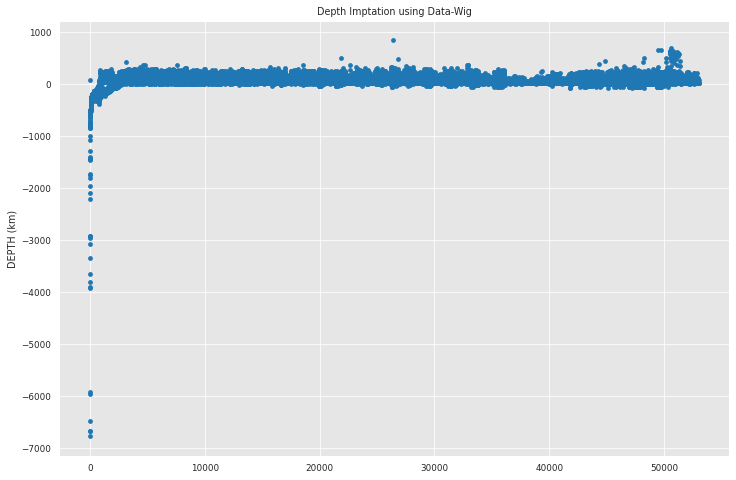

In [65]:
# Plot the depth profile...
plt.figure(figsize = (12,8))
sns.scatterplot(x = np.arange(len(data_imputed_datawig)), 
                y = data_imputed_datawig["DEPTH (km)"], linewidth=0)#alpha = 0.7
plt.title("Depth Imptation using Data-Wig"); plt.show()

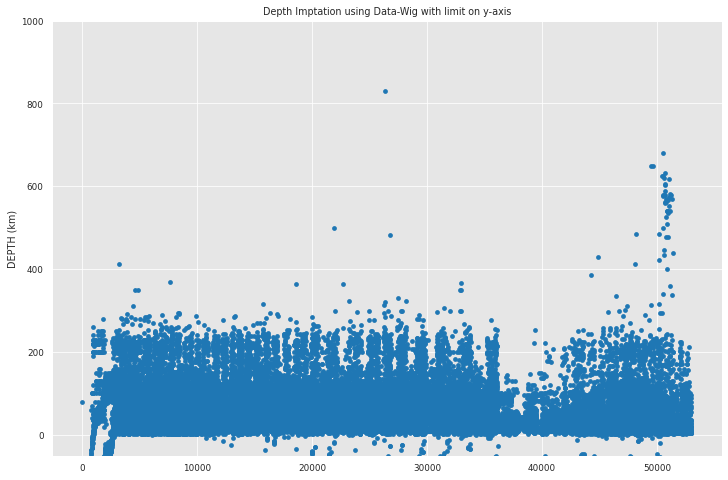

In [69]:
# Plot the depth profile...
plt.figure(figsize = (12,8))
sns.scatterplot(x = np.arange(len(data_imputed_datawig)), 
                y = data_imputed_datawig["DEPTH (km)"], linewidth=0)#alpha = 0.7
plt.ylim(-50, 1000); plt.title("Depth Imptation using Data-Wig with limit on y-axis"); plt.show()

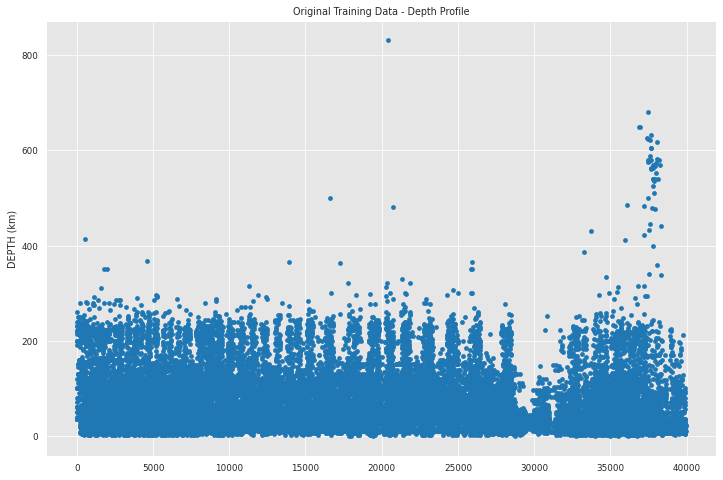

In [71]:
# Plot the depth profile...
plt.figure(figsize = (12,8))
sns.scatterplot(x = np.arange(len(df_train)), 
                y = df_train["DEPTH (km)"], linewidth=0)#alpha = 0.7
plt.title("Original Training Data - Depth Profile"); plt.show()

__Seeing both the plots we can `drop` this method of imputation as of now.__

**Again we can see the `datawig()` model is not completely trained and `earlystopping` is being applied. So it's better to avoid this imputation method.**

https://scikit-learn.org/stable/modules/impute.html#iterative-imputer

https://machinelearningmastery.com/iterative-imputation-for-missing-values-in-machine-learning/

#### MICE (from `fancyimpute`)

In [ ]:
# calling the  MICE class
mice_imputer = MICE()
# imputing the missing value with mice imputer
data_imputed_MICE = mice_imputer.fit_transform(data)
# printing dataframe
data_imputed_MICE = pd.DataFrame(data_imputed_MICE, columns = ['YEAR', 'MONTH', 'DATE', 'LAT (N)', 'LONG (E)', 'DEPTH (km)'])

In [37]:
data_imputed_MICE.head(7)

,YEAR,MONTH,DATE,LAT (N),LONG (E),DEPTH (km)
0,25.0,1.0,1.0,72.900002,33.720001,944.543811
1,26.0,5.0,10.0,17.299999,80.099998,925.634431
2,26.0,5.0,10.0,26.000000,97.000000,80.000000
3,50.0,1.0,1.0,69.500000,37.099998,932.272838
4,110.0,1.0,1.0,76.470001,18.100000,907.689702
5,250.0,1.0,1.0,74.500000,34.599998,844.679345
6,260.0,1.0,1.0,77.199997,30.500000,841.090996


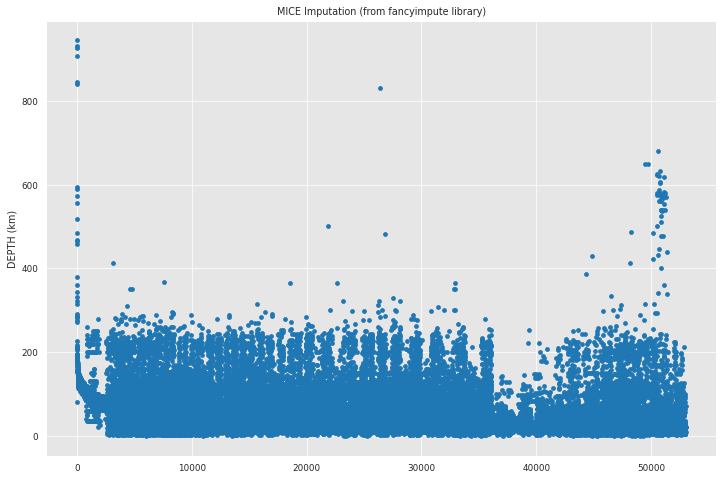

In [64]:
# Plot the depth profile...
plt.figure(figsize = (12,8))
sns.scatterplot(x = np.arange(len(data_imputed_MICE)), 
                y = data_imputed_MICE['DEPTH (km)'], linewidth=0)#alpha = 0.7
plt.title("MICE Imputation (from fancyimpute library)"); plt.show()

#### Iterative Imputer (from `scikit-learn`)

In [39]:
# Estimate the score after iterative imputation of the missing values
# with different estimators
estimators = [
    BayesianRidge(),
    ExtraTreesRegressor(n_estimators=50, random_state=0),
    RandomForestRegressor(n_estimators=50, random_state=0)
]
data_imputed_iterative = {}
estimator_names = ['bayesian_ridge', 'extra_trees_regressor', 'random_forest_regressor']
for name, impute_estimator in zip(estimator_names, estimators):
    data_imputed_iterative[name] = IterativeImputer(random_state=0, estimator=impute_estimator,
                                                    imputation_order='random').fit_transform(data.values)
    data_imputed_iterative[name] = pd.DataFrame(data_imputed_iterative[name], columns = ['YEAR', 
                                                                                         'MONTH', 
                                                                                         'DATE', 
                                                                                         'LAT (N)', 
                                                                                         'LONG (E)', 
                                                                                         'DEPTH (km)'])

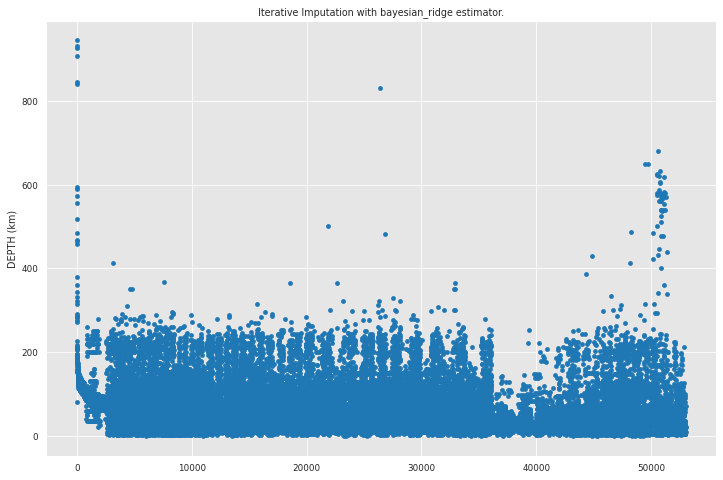

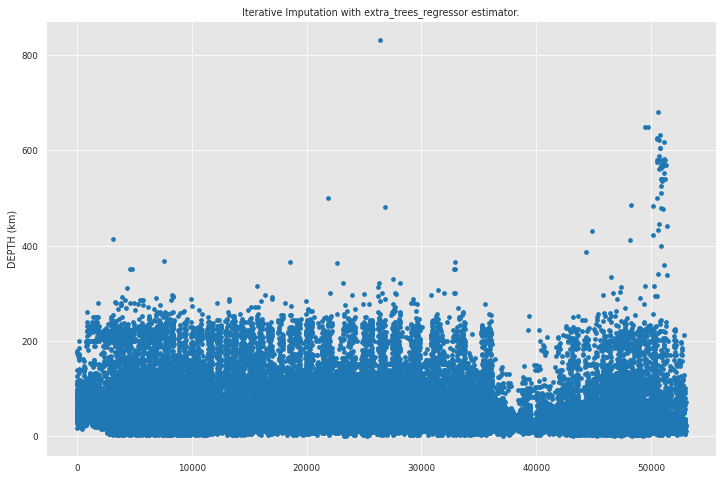

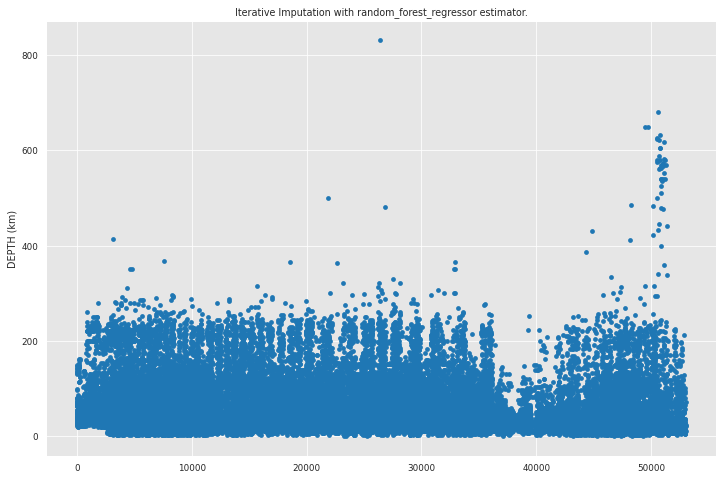

In [40]:
# Plot the depth profile...
for name in estimator_names:
    plt.figure(figsize = (12,8))
    sns.scatterplot(x = np.arange(len(data_imputed_iterative[name])), 
                    y = (data_imputed_iterative[name])["DEPTH (km)"], linewidth=0)#alpha = 0.7
    plt.title(f"Iterative Imputation with {name} estimator.")
plt.show()

__Indeed, the imputation results we obtained through MICE of `facyimpute` package is same as `IterativeImputer` with `Bayesian Ridge` as estimator. Plus, in the documentation of scikit (user-guide) it's clearly mentioned that the Iterative Imputation is purely inspired from MICE algorithm.__

In [41]:
# append the label column.
for key in data_imputed_iterative.keys():
    (data_imputed_iterative[key])['Magnitude'] = label
data_transformed_KNN['Magnitude'] = label

__Last Pre-Pocessing Step...__

Remove duplicate rows present in the dataframe, if any. And finally save all four dataframes.

In [42]:
# Remove the DUPLICATE Rows --- LAST Pre-processing.
for key in data_imputed_iterative.keys():
    data_imputed_iterative[key] = (data_imputed_iterative[key])[~data_imputed_iterative[key].duplicated(keep = 'last')]
data_transformed_KNN = data_transformed_KNN[~data_transformed_KNN.duplicated(keep = 'last')]

In [43]:
# Save all the transformed datasets as excel file.
for key in data_imputed_iterative.keys():
    (data_imputed_iterative[key]).to_excel("imputed_data/Imputed_iterative_"+key+".xlsx", engine = "openpyxl")
data_transformed_KNN.to_excel("imputed_data/Imputed_KNN.xlsx")
print("Successfully Saved!")

Successfully Saved!


In [2]:
# Import data-sets.
data_dict = {}
for file in os.listdir(os.path.join("imputed_data", "")):
    data_dict[file.split(".")[0]] = pd.read_excel("imputed_data/"+file)

# Tasks

Use __KNN__, __Decision Trees__ and __Ensemble Learning__ to build classifiers for predicting labels as Magnitude (*Mw*). Use an appropriate threshold that seem fit between $[4, 5]$ inclusive. Consider a threshold of $T$. For *Mw* $< T$, label becomes $0$ (no earthquake) and for *Mw* $\geq T$ becomes $1$ (earthquake). Use appropriate features as input from the dataset that you seem fit. Please mention what threshold you used and what is the train-test split size that you used in the submission.

In [45]:
#Import all the required models...
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
#from xgboost import XGBClassifier
#from sklearn.ensemble import VotingClassifier

__Define the label column according to a particular threshold.__

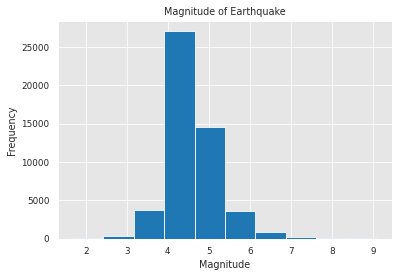

In [47]:
# Usually 0.5 is taken as the threshold when decisions are made between [0, 1]. Now we'll just scale it to the actual range of Magnitude.
magnitude = (data_dict["Imputed_iterative_bayesian_ridge"]['Magnitude'])[data_dict["Imputed_iterative_bayesian_ridge"]['Magnitude'].notnull()]
magnitude.hist(); plt.title("Magnitude of Earthquake"); plt.xlabel("Magnitude"); plt.ylabel("Frequency"); plt.show()

* To decide the threshold $T$ for `Magnnitude` column, we scaled up the $[0, 1]$ interval to the “range” of magnitue column (i.e., $\max(mag ni t ud e) - \min(mag ni t ud e)$) and shifted it by a $constant = \min(mag ni t ud e)$.

* Now as $0.5$ is a safe choice in $[0, 1]$ interval, correspondingly we chose that value in scaled and shifted interval as our threshold (i.e., $= 5.3914$). 

* Again our choice for such threshold is motivated by the fact that distribution of `Magnitude` is **mostly gaussian with a little skew towards left (positively skewed)**. So choosing a value in between would do the needful.

$$T = 0.5\left(\max(magnitude)-\min(magnitude)\right) + \min(magnitude)= 5.3914$$

In [49]:
#0.5*(magnitude.max() - magnitude.min()) + magnitude.min()
T = 0.5*(magnitude.max() - magnitude.min()) + magnitude.min() # Also magnitude.mean() or .median() can be used.
print("The Threshold for Magnitude that classify it as Earthquake and Non-Earthquake: ", T)

The Threshold for Magnitude that classify it as Earthquake and Non-Earthquake:  5.3914


__Redefine the dataset by dropping the Magnitude Column and splitting it into Train, Dev, and Test.__

In [62]:
# Let's first sparate out the test data (i.e., for which Magnitude is nan).
train_val_dict, test_dict = {}, {}
#req_cols = list(data_dict["Imputed_iterative_bayesian_ridge"].columns)[1:-1]
for key in data_dict.keys():
    train_val_dict[key] = ((data_dict[key])[data_dict[key]['Magnitude'].notnull()]).drop(columns = ["Unnamed: 0"])
    test_dict[key] = ((data_dict[key])[data_dict[key]['Magnitude'].isnull()]).drop(columns = ["Unnamed: 0"])

__Define Models and Evaluation Criteria...__

In [51]:
# get a list of models to evaluate
def get_models():
    """
    Return three different models each of different versions (i.e., with different parameters) 
    """
    models_param = [{"n_neighbors": [50, 80, 120, 150, 180]}, 
                    {"max_depth": [3, 5, 7, 9, 11]}, 
                    {"n_estimators": [10, 25, 50, 100, 150]}]
    models = [KNeighborsClassifier(),
              DecisionTreeClassifier(random_state=23),
              LGBMClassifier(random_state = 23)
             ]
    return models, models_param


# evaluate a give model using cross-validation
def evaluate_model(model, param_grid):
    """
    Train model with GridSearchCV mode on the given parameters.
    """
    cv = StratifiedKFold(n_splits=5, random_state=23, shuffle=True)
    return GridSearchCV(model, param_grid, scoring="roc_auc", n_jobs=-1, cv=cv, verbose=1)

##### __Train the Models and obtain their scores for every possible parameter for each model.__

For each dataset (**total 4**), we performed `GridSearch()` with `StratifiedKFold()` with $K = 5$ as our cross-validation. We took $5$ parameters for each of the $3$ models (shown below) and trained it for $5$ times in each fold, which totals to $25$ run for $5$ folds. And $75$ runs for all $3$ models. $75 \times 4 = 300$ runs for all $4$ datasets.

| $n\_neighbors$ (KNN) | $max\_depth$ (Decision Tree) | $n\_estimators$ (LightGBM) |
|--------------------|----------------------------|--------------------------|
| 50                 | 3                          | 10                       |
| 80                 | 5                          | 25                       |
| 120                | 7                          | 50                       |
| 150                | 9                          | 100                      |
| 180                | 11                         | 150                      |

In [70]:
# Run in Loop and Store the results for each Data.
final_results = {}
for data_key in train_val_dict.keys():
    # Call get_model() to get Models and Their Parameters 
    models, models_param = get_models()
    # Initialize new dictionary for each DataSet.
    final_results[data_key] = {}
    for model, param in zip(models, models_param):
        labels = (train_val_dict[data_key]["Magnitude"] >= T).astype(np.int32)
        if model.__class__.__name__ == "KNeighborsClassifier":
            # Rescaling data for KNN within 0 and 1.
            data = train_val_dict[data_key].iloc[:, :-1].apply(lambda x: (x - min(x))/(max(x) - min(x)))
        else:
            data = train_val_dict[data_key].iloc[:, :-1]
        grid_model = evaluate_model(model, param)
        grid_result = grid_model.fit(data, labels)
        final_results[data_key][model.__class__.__name__] = grid_result

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


## Task 1

Plot __ROC__ for both these classifiers for $K$ as parameter in __KNN__, **pre-prune depth** as a parameter in __Decision Tree__ and __number of estimators__ as parameter in __Ensemble learning__.

In [71]:
# Helper Functions...
def d_to_arr(d, key):
    return np.array([dict_ele[key] for dict_ele in d])

def to_dataframe(data_scores):
    final_df = []
    for data_name in data_scores.keys():
        df = pd.DataFrame.from_dict(data_scores[data_name]).assign(DataName=data_name)
        final_df.append(df)
    return pd.concat(final_df, axis = 0, ignore_index = True)    

### KNN as Predictor.

In [72]:
# Plotting ROC scores for KNN Model with every parameter configuration for each DATASet.
data_scores_knn = {data_name:
               {"mean_test_score":final_results[data_name]["KNeighborsClassifier"].cv_results_["mean_test_score"], 
                "params":d_to_arr(final_results[data_name]["KNeighborsClassifier"].cv_results_["params"], "n_neighbors"),
                "std_test_score":final_results[data_name]["KNeighborsClassifier"].cv_results_["std_test_score"]} 
                for data_name in final_results.keys()}

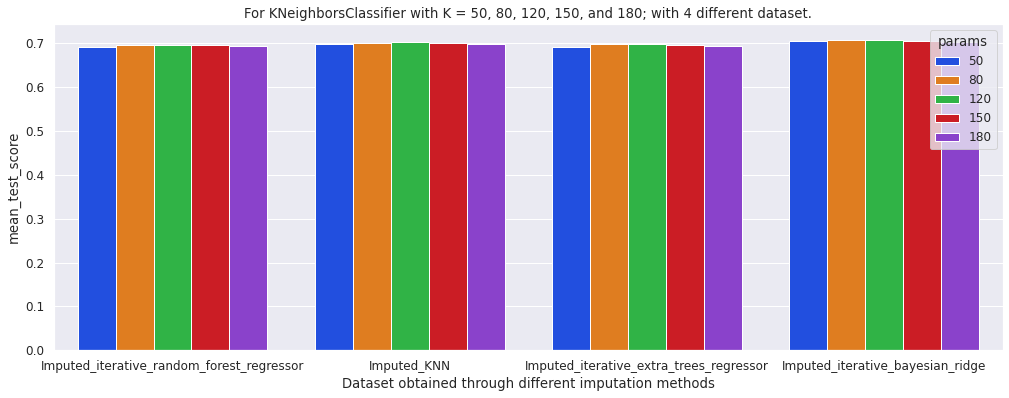

In [73]:
# Transformed DataFrame
df_knn = to_dataframe(data_scores_knn)

# Plot Grouped BAR plot...
sns.set_theme(style="whitegrid"); sns.set_context("paper")

plt.figure(figsize = (17, 6))
# class v / s fare barplot
sns.set(font_scale = 1.1)
ax = sns.barplot(x = 'DataName', y = 'mean_test_score', hue = 'params', 
            data = df_knn, palette = sns.color_palette("bright"))
ax.set_title("For KNeighborsClassifier with K = 50, 80, 120, 150, and 180; with 4 different dataset.")
ax.set_xlabel("Dataset obtained through different imputation methods")
# Show the plot
plt.show()

In [74]:
# best for each data.
best_results_knn = pd.DataFrame([[data_name, final_results[data_name]["KNeighborsClassifier"].best_score_, 
                     final_results[data_name]["KNeighborsClassifier"].best_params_] 
                    for data_name in final_results.keys()], columns = ["DataSet name", "Best Score", "Best Parameters"])

best_results_knn

,DataSet name,Best Score,Best Parameters
0,Imputed_iterative_random_forest_regressor,0.696671,{'n_neighbors': 120}
1,Imputed_KNN,0.702050,{'n_neighbors': 120}
2,Imputed_iterative_extra_trees_regressor,0.697251,{'n_neighbors': 80}
3,Imputed_iterative_bayesian_ridge,0.707918,{'n_neighbors': 80}


### Decision Trees as Predcitor.

In [75]:
# Plotting ROC scores for Decision Tree with every parameter configuration for each DATASet."LGBMClassifier"
data_scores_dt = {data_name:
               {"mean_test_score":final_results[data_name]["DecisionTreeClassifier"].cv_results_["mean_test_score"], 
                "params":d_to_arr(final_results[data_name]["DecisionTreeClassifier"].cv_results_["params"], "max_depth"),
                "std_test_score":final_results[data_name]["DecisionTreeClassifier"].cv_results_["std_test_score"]} 
                for data_name in final_results.keys()}

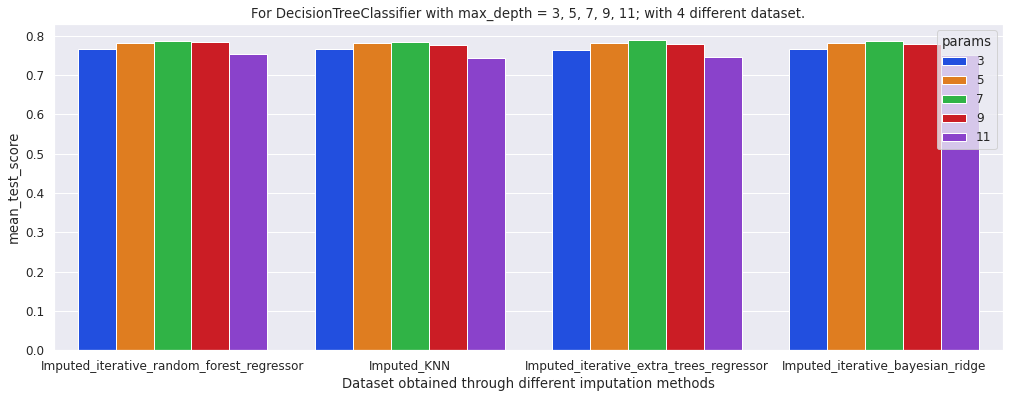

In [76]:
# Transformed DataFrame
df_dt = to_dataframe(data_scores_dt)

# Plot Grouped BAR plot...
sns.set_theme(style="whitegrid"); sns.set_context("paper")

plt.figure(figsize = (17, 6))
# class v / s fare barplot
sns.set(font_scale = 1.1)
ax = sns.barplot(x = 'DataName', y = 'mean_test_score', hue = 'params', 
            data = df_dt, palette = sns.color_palette("bright"))
ax.set_title("For DecisionTreeClassifier with max_depth = 3, 5, 7, 9, 11; with 4 different dataset.")
ax.set_xlabel("Dataset obtained through different imputation methods")
# Show the plot
plt.show()

In [77]:
# best for each data.
best_results_dt = pd.DataFrame([[data_name, final_results[data_name]["DecisionTreeClassifier"].best_score_, 
                     final_results[data_name]["DecisionTreeClassifier"].best_params_] 
                    for data_name in final_results.keys()], columns = ["DataSet name", "Best Score", "Best Parameters"])

best_results_dt

,DataSet name,Best Score,Best Parameters
0,Imputed_iterative_random_forest_regressor,0.786551,{'max_depth': 7}
1,Imputed_KNN,0.784880,{'max_depth': 7}
2,Imputed_iterative_extra_trees_regressor,0.789578,{'max_depth': 7}
3,Imputed_iterative_bayesian_ridge,0.787396,{'max_depth': 7}


### Ensemble Learning as Predictor.

In [78]:
# Plotting ROC scores for Ensemble Model (LightGBM) with every parameter configuration for each DATASet.
data_scores_lgbm = {data_name:
               {"mean_test_score":final_results[data_name]["LGBMClassifier"].cv_results_["mean_test_score"],
                "params":d_to_arr(final_results[data_name]["LGBMClassifier"].cv_results_["params"], "n_estimators"),
                "std_test_score":final_results[data_name]["LGBMClassifier"].cv_results_["std_test_score"]} 
                for data_name in final_results.keys()}

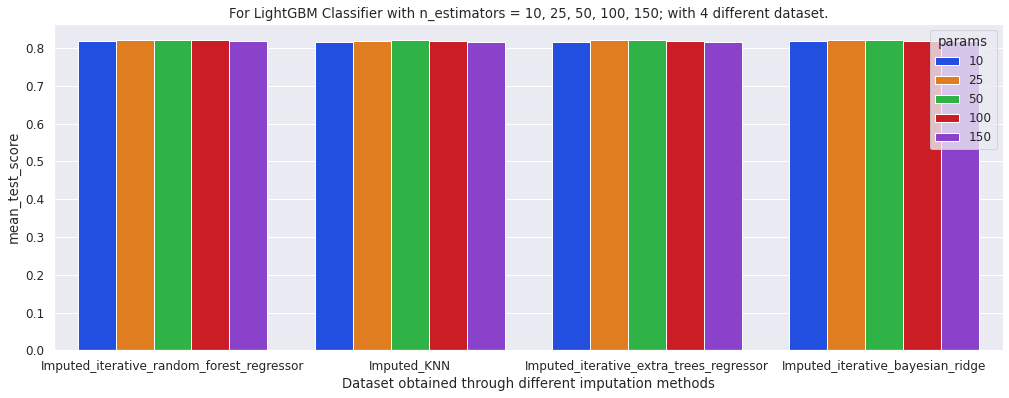

In [79]:
# Transformed DataFrame
df_lgbm = to_dataframe(data_scores_lgbm)

# Plot Grouped BAR plot...
sns.set_theme(style="whitegrid"); sns.set_context("paper")

plt.figure(figsize = (17, 6))
# class v / s fare barplot
sns.set(font_scale = 1.1)
ax = sns.barplot(x = 'DataName', y = 'mean_test_score', hue = 'params', 
            data = df_lgbm, palette = sns.color_palette("bright"))
ax.set_title("For LightGBM Classifier with n_estimators = 10, 25, 50, 100, 150; with 4 different dataset.")
ax.set_xlabel("Dataset obtained through different imputation methods")
# Show the plot
plt.show()

In [80]:
# best for each data.
best_results_lgbm = pd.DataFrame([[data_name, final_results[data_name]["LGBMClassifier"].best_score_, 
                     final_results[data_name]["LGBMClassifier"].best_params_] 
                    for data_name in final_results.keys()], columns = ["DataSet name", "Best Score", "Best Parameters"])

best_results_lgbm

,DataSet name,Best Score,Best Parameters
0,Imputed_iterative_random_forest_regressor,0.822354,{'n_estimators': 50}
1,Imputed_KNN,0.820575,{'n_estimators': 50}
2,Imputed_iterative_extra_trees_regressor,0.820878,{'n_estimators': 50}
3,Imputed_iterative_bayesian_ridge,0.821555,{'n_estimators': 50}


###### Analysis:

__Seeing above results we infer that, MORE or LESS every Imputation worked well and are at par with each other.__

1. __The one that gave the best performance with all the 3 models is `Random Forest Regressor` embedded as estimator in `Iterative Imputer`.__
2. __Secondly, with `Grid Search` and `Cross-validation` with 5 folds (that split TRAIN and VAL into 80%:20% = 4:1) we obtained our best parameters for each model.__
3. __Among all the `Ensemble` classifier that's the `LightGBM` performed the best.__

## Task 2

Which is the better classifier for this data amongst the three? Give Reasoning.

__Answer:__

As we discussed above the `LightGBM` is the best classifier amongst the three.\
**Reasoning**:

1. Since this is a boosting classifier it consists of iteratively (sequentially) learning weak classifiers with respect to a distribution with a motive to rectify the mistakes commited by the previous classifier i.e., basically tries to correctly classify the mis-classified sample from previous learner. 
2. And in this process more weight is being conferred to the mis-classified data while a successive learner (classifier) tries to learn. 
3. Finally, combining them generates strong classifier where all the learners decisions are respected through a voting criteria.

## Task 3

What could be the best possible values of the parameters for respective
classifier based on the ROC curves? Give Reasoning.

***Answer***:

The best possible values of parameters according to the `GridSearch()` implemented are as follows:
1. k-Neighbors Classifier: $k = n\_neighbors = 120$ for all four dataset.\
Reasoning:
    * When the value of $K$ or the number of neighbors is too low, the algorithm picks only the data-points that are closest to the given data sample, thus forming a very complex decision boundary. Such a model fails to generalize well on the test data set, thereby showing poor results. 
    * The problem can be mitigated by tweaking `n_neighbors` parameter. As we increase the number of neighbors, the model starts to generalize well, but increasing the value too much would again drop the performance.
2. Decision Tree: Depth of Tree $= max\_depth = 7$ for all four dataset.\
Reasoning:
    * If we restrict our decision trees to have a lower depth then we couldn't have enough splits to reach the pure leaf node where decisions are taken and hence pre-mature pruning causes model to underfit.
    * And if we allow our tree to grow deeper, our model will become more complex since we are having enough splits which captures more information this causes overfitting as our model will fit perfectly for the training data and will not be able to generalize well on test set.
3. LightGBM: Number of Estimators = Number of Decision Trees $= n\_estimators = 50$ for all four dataset.\
Reasoning:
    * Here again we're facing the same scenario. Taking less than $50$ trees doesn't allow the whole model to completely understand the data i.e., the mis-classification problem with each sequential weak learner is not completely eradicated. And taking $\geq 50$ allowed it to understand the data more closely and hence overfit.

## Task 4
If you have to choose only a subset of **two** features to predict earthquake, which ones would it be? Give Reasoning. [*Hint: You may use nodes of estimated Decision Tree or other techniques*]

In [99]:
# Final Data -- Choose one of the four dataset.
final_data = train_val_dict["Imputed_iterative_random_forest_regressor"].iloc[:, :-1]
labels_final = (train_val_dict["Imputed_iterative_random_forest_regressor"]["Magnitude"] >= T).astype(np.int32)

In [100]:
# Perform feature Importance Analysis using RandomForestClassifier on final_data.
# define the model
feature_imp_model = RandomForestClassifier()
# fit the model
feature_imp_model.fit(final_data, labels_final)
# get importance
importance = feature_imp_model.feature_importances_

 Feature: YEAR, Score: 0.31644 
 Feature: MONTH, Score: 0.06361 
 Feature: DATE, Score: 0.09923 
 Feature: LAT (N), Score: 0.19354 
 Feature: LONG (E), Score: 0.19792 
 Feature: DEPTH (km), Score: 0.12926 


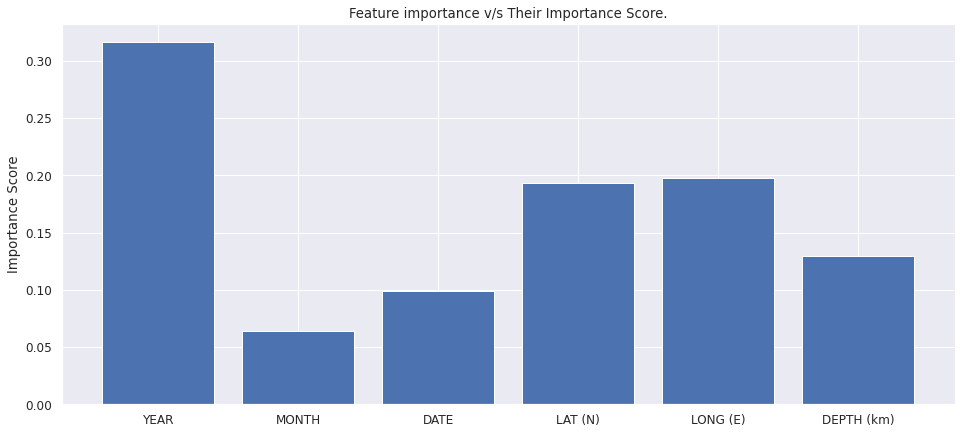

In [101]:
# summarize feature importance
for i,v in zip(list(final_data.columns), importance):
    print( ' Feature: %s, Score: %.5f ' % (i,v))
# plot feature importance
plt.figure(figsize = (16, 7)); plt.title("Feature importance v/s Their Importance Score.")
plt.bar(list(final_data.columns), importance); plt.ylabel("Importance Score"); plt.show()

__So as per above analysis, we can assert that `YEAR`, `LAT (N)` and `LONG (E)` are the features among all that best explains the Magnitude.__

***Reasoning:***
1. According to Longitude and Latidude, we can have information about Earthquake prone location or we can put it in this way that at given (Longitude, Latitude) the tectonic plate exhibit such motions that decide about the magnitude of earthquake and it's degree of severeness.
2. Normally, at locations where tectonic plates collide (convergent boundary) or emerge (divergent boundary), we can witness earthquake, not all locations do that.
3. `YEAR` record the time-stamp or time-rate of change of plates boundary position which informs us regarding the tectonic activity which may occur in future (resulting in Earth-Quake). If time-rate is high then for sure in future there will be earthquakes and it's a earthquake prone zone. So given the time-rate and co-ordinates, one can predict is this a earth-quake prone zone or not and accordingly can predict when next the future earthquake will happen.

## Task 5
Consider **test results** of the **best model** from above analysis. Report the input features that was used to achieve this. Try to improvise the test results by applying **feature processing** (You may come up with additional features by processing original ones).\
Report the new set of features that was used and also report the improvements in test results that was achieved. Please use appropriate metrics to report the results.

***Answer:***
1. __According to the 5-fold CV results, the best model is none other than `LightGBM` classifier with ROC-AUC score $= 82.2$.__
2. Input Features used = `YEAR`, `MONTH`, `DATE`, `LAT (N)`, `LONG (E)`, and `DEPTH (km)`

In [109]:
# Adding Latitude and Longitude ratio as new feature column.
new_data = final_data.assign(LAT_LONG_Ratio = lambda x: x["LAT (N)"]/x["LONG (E)"])

In [112]:
# define an instance of LightGBM model
lgbm = LGBMClassifier(n_estimators = 50, random_state = 23)
# fit the model with 5-fold Cross-validation
# define cv splitter
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)#, shuffle=True, random_state=23
# Load the model and Data to instance of splitter and fit.
scores = cross_val_score(lgbm, new_data, labels_final, cv=cv, n_jobs = -1,  scoring="roc_auc", verbose=1)

# print the scores.
print(f"Scores for 5 folds: {scores}\nAverage score = {np.mean(scores)}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Scores for 5 folds: [0.83168649 0.80908615 0.82557257 0.81675682 0.82167914]
Average score = 0.8209562341154049


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


##### Analysis...

1. __With addition of *Ratio column* for dataset imputed with `Random Forest regressor` method embedded in `Iterative Imputation` wrapper, we got a decrement in `ROC_AUC` score from `0.822354` to `0.820956` which is almost 0.17% decrement.__
2. __New features: `YEAR`, `MONTH`, `DATE`, `LAT (N)`, `LONG (E)`, `DEPTH (km)`, `LAT_LONG_Ratio`.__
3. **Feel free to `fork` this note-book and play around any sections you want. Also `comment down` if anyone comes up with `feature-engneering` method that help models perform better.**

# ROUGH

###### shuffle the samples
df = df.sample(n = len(df), random_state = 42)
df = df.reset_index(drop = True)
df_valid = df.sample(frac = 0.3, random_state = 42)
df_train = df.drop(df_valid.index)